In [1]:
import gdown

url = 'https://drive.google.com/uc?id=1EOCXbzOJgg-MyJWrmZAWz3QDlvMdMiLA'
output = 'mask.png'
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/uc?id=1gdcYbBtnTzhmbnwIcuXC2O_EzssOQyXS'
output = 'img.png'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1EOCXbzOJgg-MyJWrmZAWz3QDlvMdMiLA
To: /content/mask.png
100%|██████████| 30.6k/30.6k [00:00<00:00, 10.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gdcYbBtnTzhmbnwIcuXC2O_EzssOQyXS
To: /content/img.png
100%|██████████| 5.92M/5.92M [00:00<00:00, 41.2MB/s]


'img.png'

In [2]:
!ls

img.png  mask.png  sample_data


In [3]:
import imageio
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

fn_img = './img.png'
fn_mask = './mask.png'
img = imageio.v3.imread(fn_img)[:, :, 0]
mask = imageio.v3.imread(fn_mask)

zoom_factor = .3
img = img.astype('float') / 255
img = zoom(img, (zoom_factor, zoom_factor), order=3)  # Use order=3 for cubic interpolation
mask = mask.astype('float') / 255
mask = (zoom(mask, (zoom_factor, zoom_factor), order=3) > 0.5).astype('int')

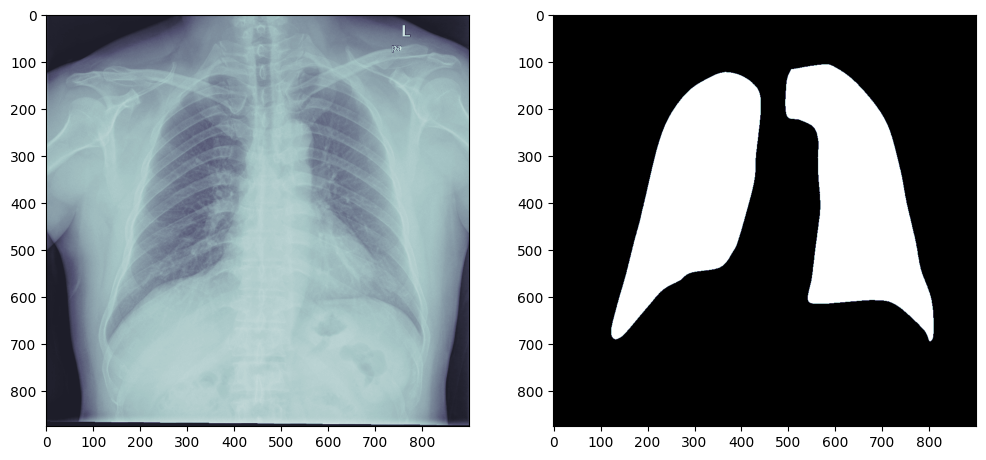

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.sca(axes[0])
plt.imshow(img, cmap = 'bone')
plt.sca(axes[1])
plt.imshow(mask, cmap = 'bone')
plt.show()

In [6]:
import numpy as np

def extract_windows(image, mask, window_size=5, stride=2):
    """
    Extracts local windows from the input image based on the mask, with zero padding to handle windows
    falling outside the image boundaries.

    Parameters:
        image (numpy.ndarray): The input image array.
        mask (numpy.ndarray): The mask array where the windows will be extracted.
        window_size (int): The size of the window (default is 5).
        stride (int): The stride for window extraction (default is 2).

    Returns:
        windows (list of numpy.ndarray): List of extracted windows.
        centers (list of tuple): List of coordinates of the centers of each window.
    """
    # Compute padding needed
    pad_size = window_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant', constant_values=0)
    padded_mask = np.pad(mask, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant', constant_values=0)

    windows = []
    centers = []
    targets = []
    height, width = image.shape
    for y in range(pad_size, height + pad_size, stride):
        for x in range(pad_size, width + pad_size, stride):
            # Define the window in the padded image
            window = padded_image[y - pad_size:y + pad_size + 1, x - pad_size:x + pad_size + 1]
            # Check if the center of the window is within the mask
            #if padded_mask[y, x]:
            windows.append(window)
            i, j = y - pad_size, x - pad_size
            centers.append((i, j))
            targets.append(mask[i, j])

    return windows, targets, centers

In [7]:
windows, targets, centers = extract_windows(img, mask, window_size=5, stride=1)

In [8]:
x = np.vstack([w.flatten()  for w in windows])
y = np.array(targets)

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x[::10], y[::10],
                                                    test_size=0.3,
                                                    random_state=42)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


In [11]:
y_pred = model.predict(x)

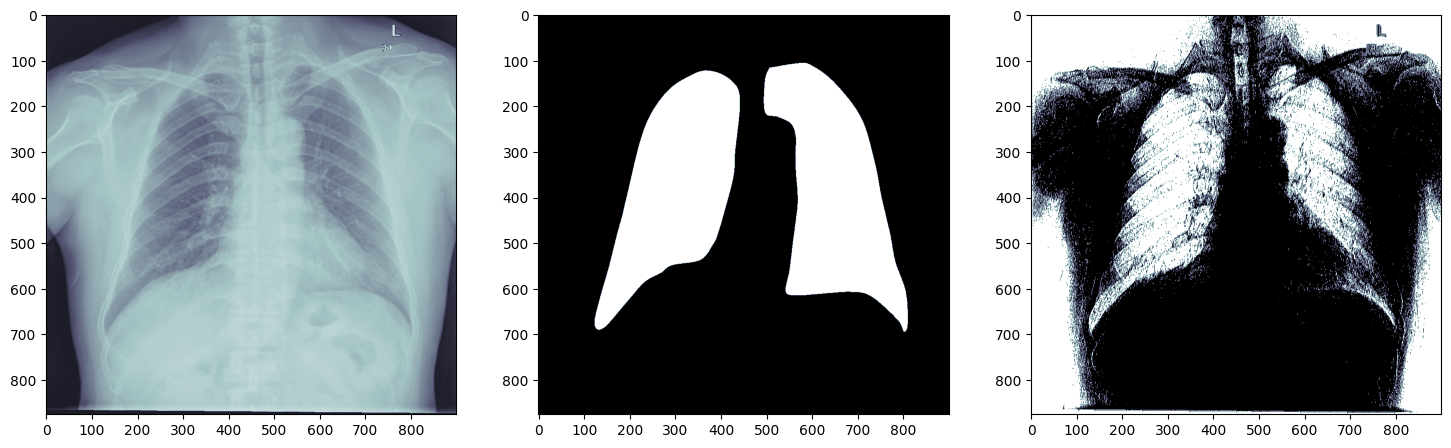

In [12]:
seg = y_pred.reshape(img.shape)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.sca(axes[0])
plt.imshow(img, cmap = 'bone')
plt.sca(axes[1])
plt.imshow(mask, cmap = 'bone')
plt.sca(axes[2])
plt.imshow(seg, cmap = 'bone')
plt.show()

Why don't you do your best?
How can we improve?

## homework
Try
* Randomforest classifier
* MLP classifier

in scikit learn


which one does better? why?